In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")

In [23]:
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [5]:
x = df.drop(["price"],axis = 1)

In [6]:
y = df["price"]

In [7]:
from sklearn import preprocessing 
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler() 
scaled_x = sx.fit_transform(x)


In [8]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_y = sy.fit_transform(y.values.reshape(df.shape[0],1))

In [10]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [11]:
w = np.ones(shape = (2))

In [12]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [13]:
np.dot(w,scaled_x.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [14]:
def batch_gradient_descent(x, y_true, epochs, learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0] 
    
    cost_list = [] 
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b  # w1*area + w2*bedrooms + bias
        
        w_grad = -(2/total_samples) * (x.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad 
        b = b - learning_rate * b_grad 
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
     
    
    return w, b, cost, cost_list, epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost                                                       
            
    
   
        
       
    
      
    

                                                       

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

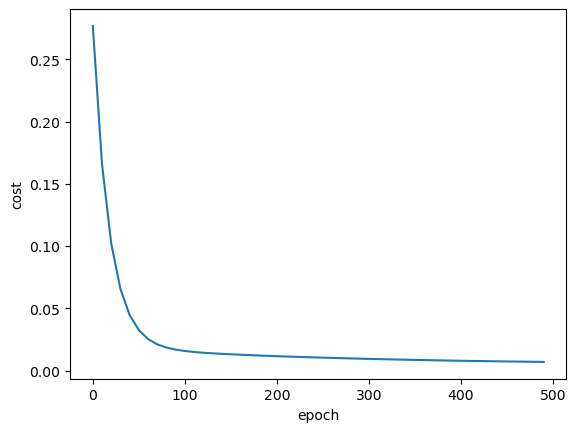

In [16]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
plt.show()

In [17]:
sx.transform([[2600,4]])

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [18]:
w

array([0.70712464, 0.67456527])

In [19]:
sy.inverse_transform([[1,0]])

array([[167.,  32.]])

In [22]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [24]:
predict(3700,5,w,b)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


187.43108020820497

In [25]:
predict(1800,3,w,b)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


79.35396924755915

# stochastic _gradient_descent

In [30]:
import random
random.randint(0,6)

2

In [44]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0] 
    
    cost_list = [] 
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b  # w1*area + w2*bedrooms + bias
        
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples) * np.sum(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad 
        b = b - learning_rate * b_grad 
        
        cost = np.square(sample_y-y_predicted)
        
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
     
    
    return w, b, cost, cost_list, epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_sgd,b_sgd,cost_sgd                                                       
            
    
   
        
       
    
      
    


(array([0.86576237, 0.83919723]), -0.25131955470474204, 0.00012611140548786812)

In [41]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

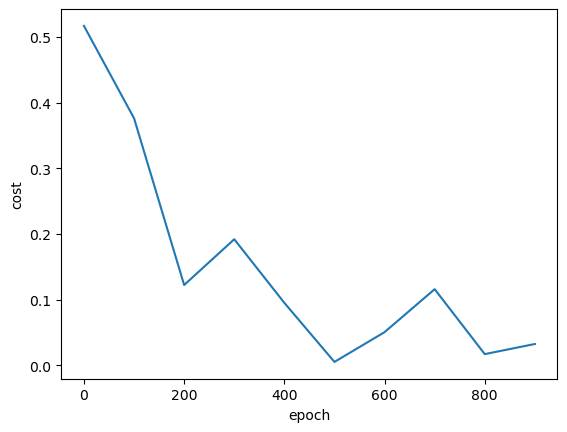

In [45]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [46]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


155.58549562300573